##Tesseract OCR##

Install Tessearct for Text Detection

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
%cd Document-Scanner

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
[Errno 2] No such file or directory: 'Document-Scanner'
/content


Define all necessary Functions

In [ ]:
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow

def rectify(h):
    h = h.reshape((4,2))
    hnew = np.zeros((4,2),dtype = np.float32)

    add = h.sum(1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]

    diff = np.diff(h,axis = 1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]

    return hnew

def resize_image(image,width,height):
	image = cv2.resize(image,(width,height))
	return image

def gray_image(image):
	image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
	return image

def canny_edge_detection(image):
	blurred_image = cv2.GaussianBlur(image,(5,5), 0)
	edges = cv2.Canny(blurred_image,0,50)
	return edges

def find_contours(image):
	(contours, _) = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
	contours = sorted(contours, key=cv2.contourArea, reverse=True)
	for c in contours:
	    p = cv2.arcLength(c, True)
	    approx = cv2.approxPolyDP(c, 0.02 * p, True)

	    if len(approx) == 4:
	        target = approx
	        break
	return target

def draw_contours(orig_image,image, target):
	approx = rectify(target)
	pts2 = np.float32([[0,0],[800,0],[800,800],[0,800]])

	M = cv2.getPerspectiveTransform(approx,pts2)
	#result = cv2.warpPerspective(image,M,(800,800))

	cv2.drawContours(image, [target], -1, (0, 255, 0), 2)
	#result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
	result = image
	return result



Read Image

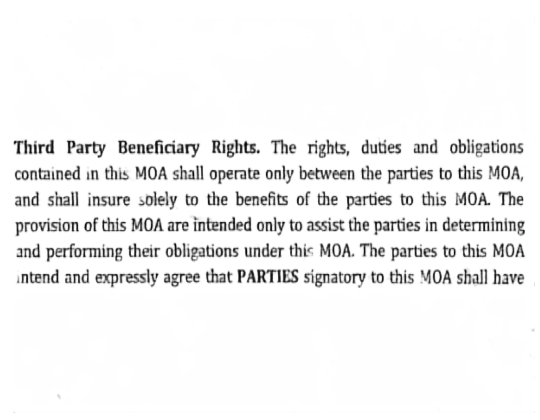

In [ ]:
image= cv2.imread('/content/ocr_try4.png')
image = resize_image(image,540,420)
orig = image.copy()
cv2_imshow(orig)

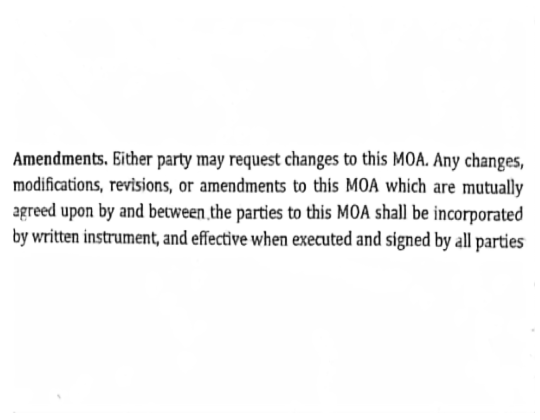

In [ ]:
image1= cv2.imread('/content/ocr_try3 (1).png')
image1 = resize_image(image1,540,420)
orig1 = image1.copy()
cv2_imshow(orig1)

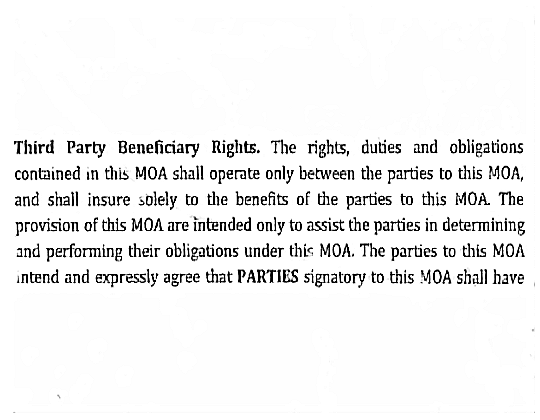

In [ ]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, kernel)
cv2_imshow(sharpened_image)

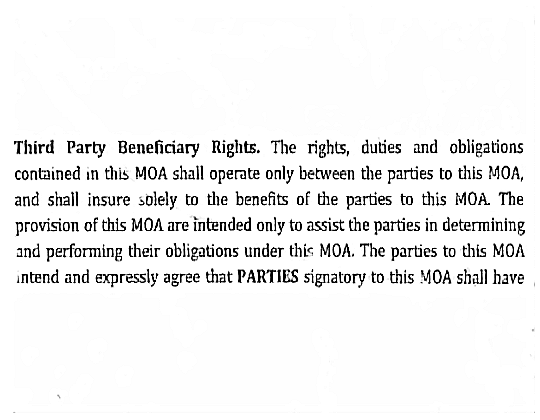

In [ ]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_image1 = cv2.filter2D(image1, -1, kernel)
cv2_imshow(sharpened_image)

In [ ]:
orig.shape

(420, 540, 3)

In [ ]:
import cv2

def enhance_resolution(image_path, scale_percent=150):
    # Load the image
    image = cv2.imread(image_path)

    # Get the original dimensions
    width = int(image.shape[1] * (scale_percent / 100))
    height = int(image.shape[0] * (scale_percent / 100))

    # Resize the image
    resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)

    return resized_image

# Example usage
input_image_path = '/content/ocr_try4.png'
output_image = enhance_resolution(input_image_path)

# Save the output image
cv2.imwrite("enhanced_image.jpg", output_image)

True

In [ ]:
import cv2

def enhance_resolution(image_path, scale_percent=150):
    # Load the image
    image = cv2.imread(image_path)

    # Get the original dimensions
    width = int(image.shape[1] * (scale_percent / 100))
    height = int(image.shape[0] * (scale_percent / 100))

    # Resize the image
    resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)

    return resized_image

# Example usage
input_image_path = '/content/ocr_try3.png'
output_image1 = enhance_resolution(input_image_path)

# Save the output image
cv2.imwrite("enhanced_image1.jpg", output_image)

True

Convert it into Grayscale Image

In [ ]:
image= cv2.imread('/content/enhanced_image.jpg')

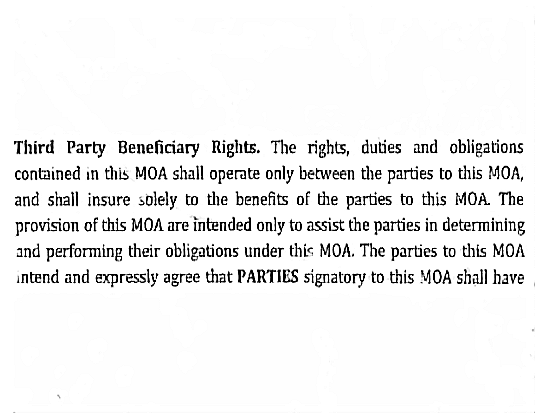

In [ ]:
gray = gray_image(image)
gray1= gray_image(sharpened_image)
cv2_imshow(gray1)

In [ ]:
image1= cv2.imread('/content/enhanced_image1.jpg')

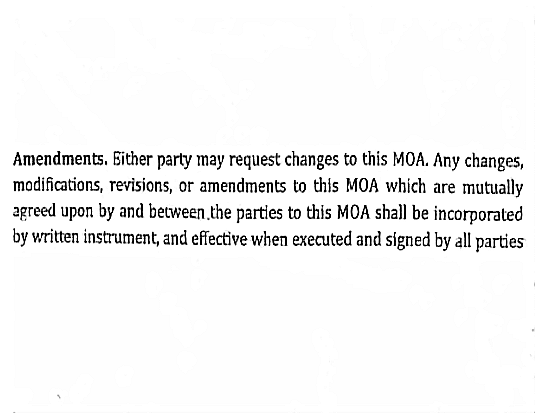

In [ ]:
gray = gray_image(image1)
gray1= gray_image(sharpened_image1)
cv2_imshow(gray1)

Binarization

In [ ]:
thresh, im_bw = cv2.threshold(output_image,185,255,cv2.THRESH_BINARY)

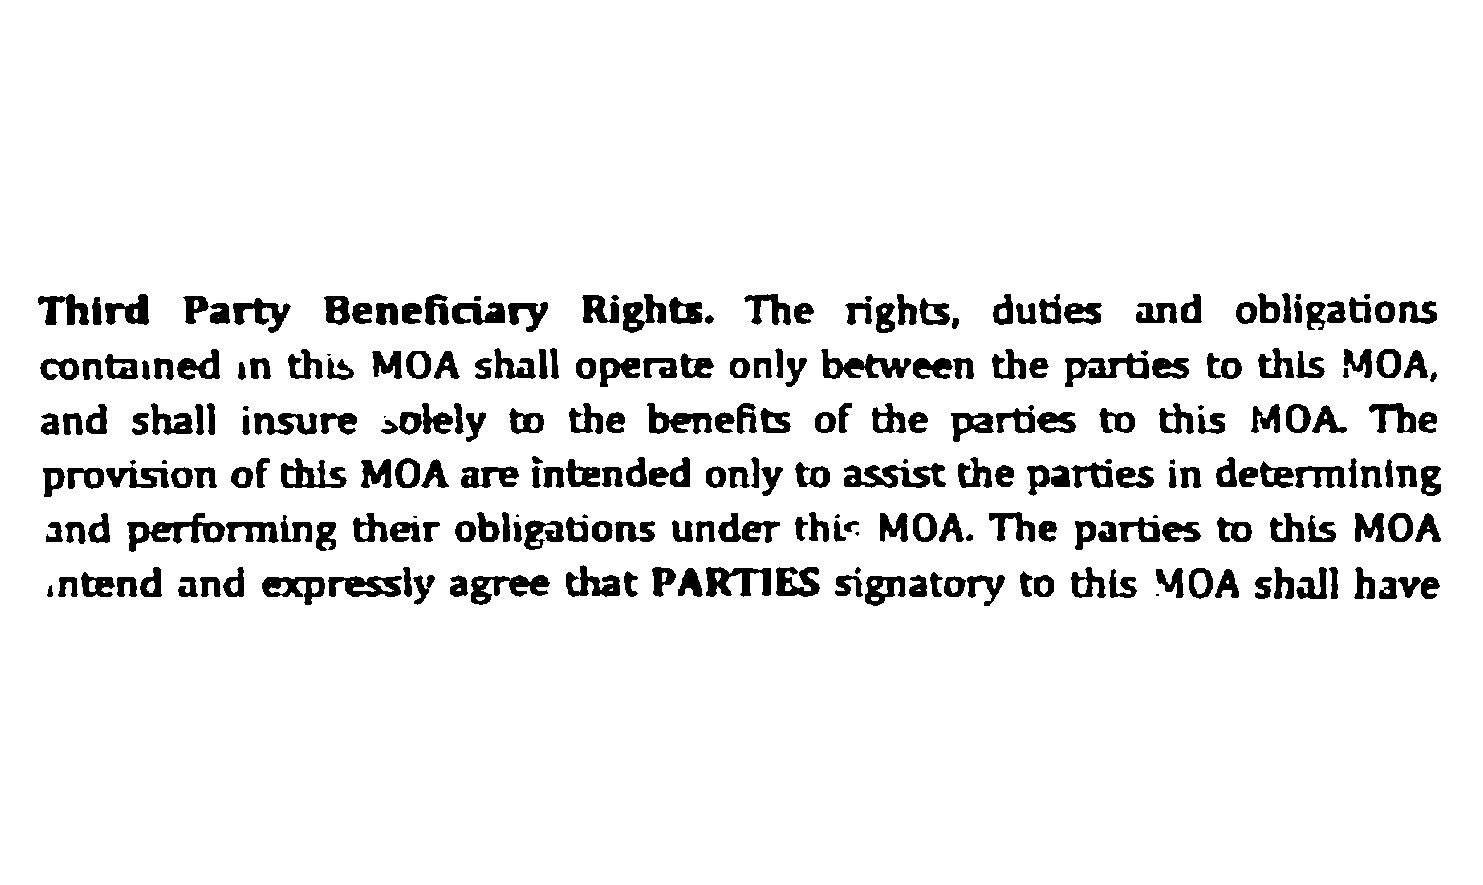

In [ ]:
cv2_imshow(im_bw)

In [ ]:
thresh, im_bw1 = cv2.threshold(output_image1,185,255,cv2.THRESH_BINARY)

Perform Edge Detection

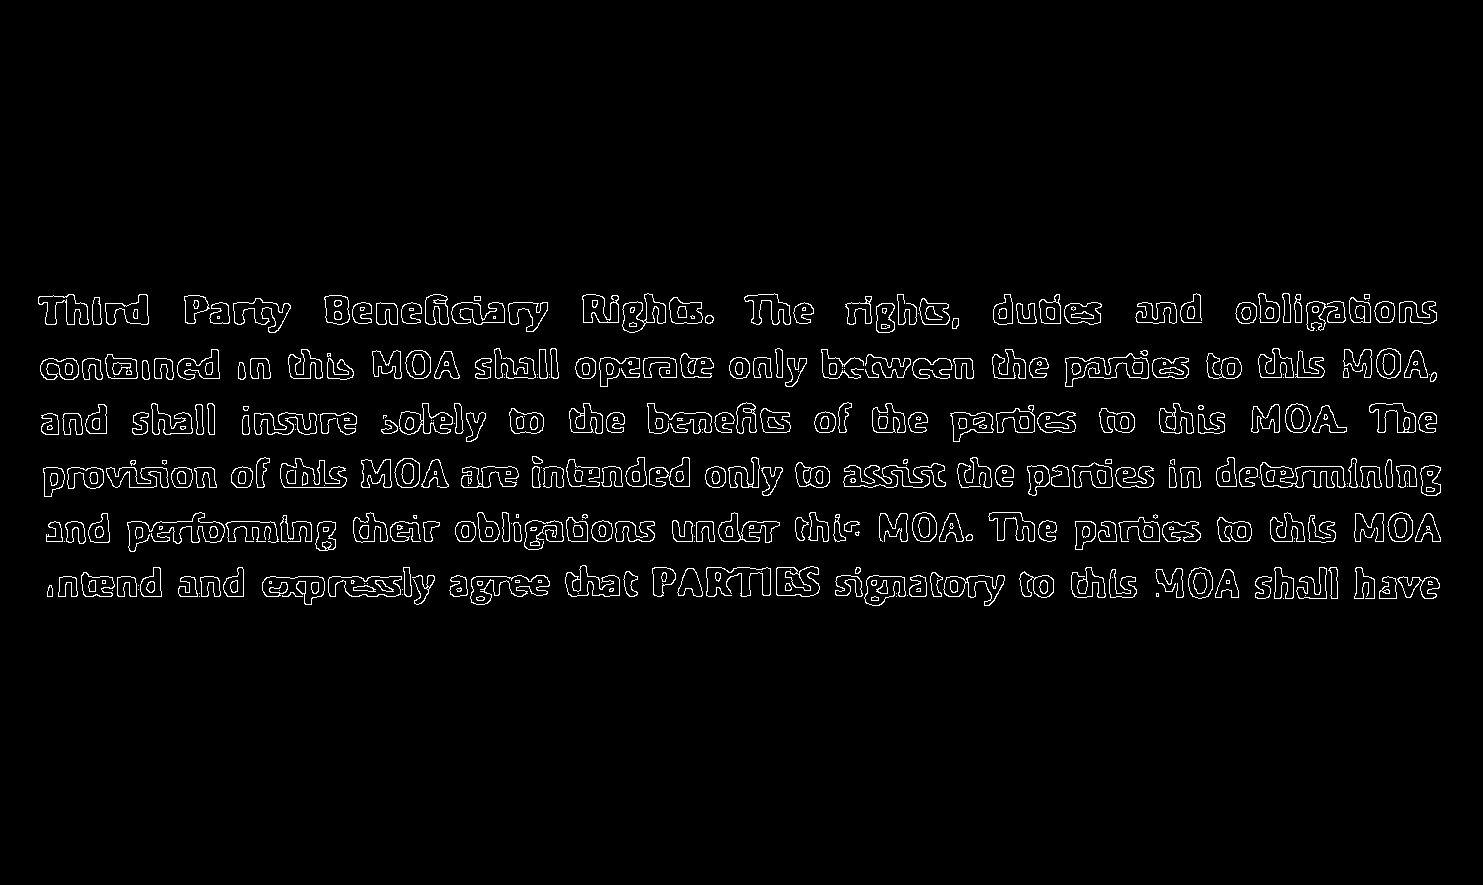

In [ ]:
edges = canny_edge_detection(im_bw)
cv2_imshow(edges)

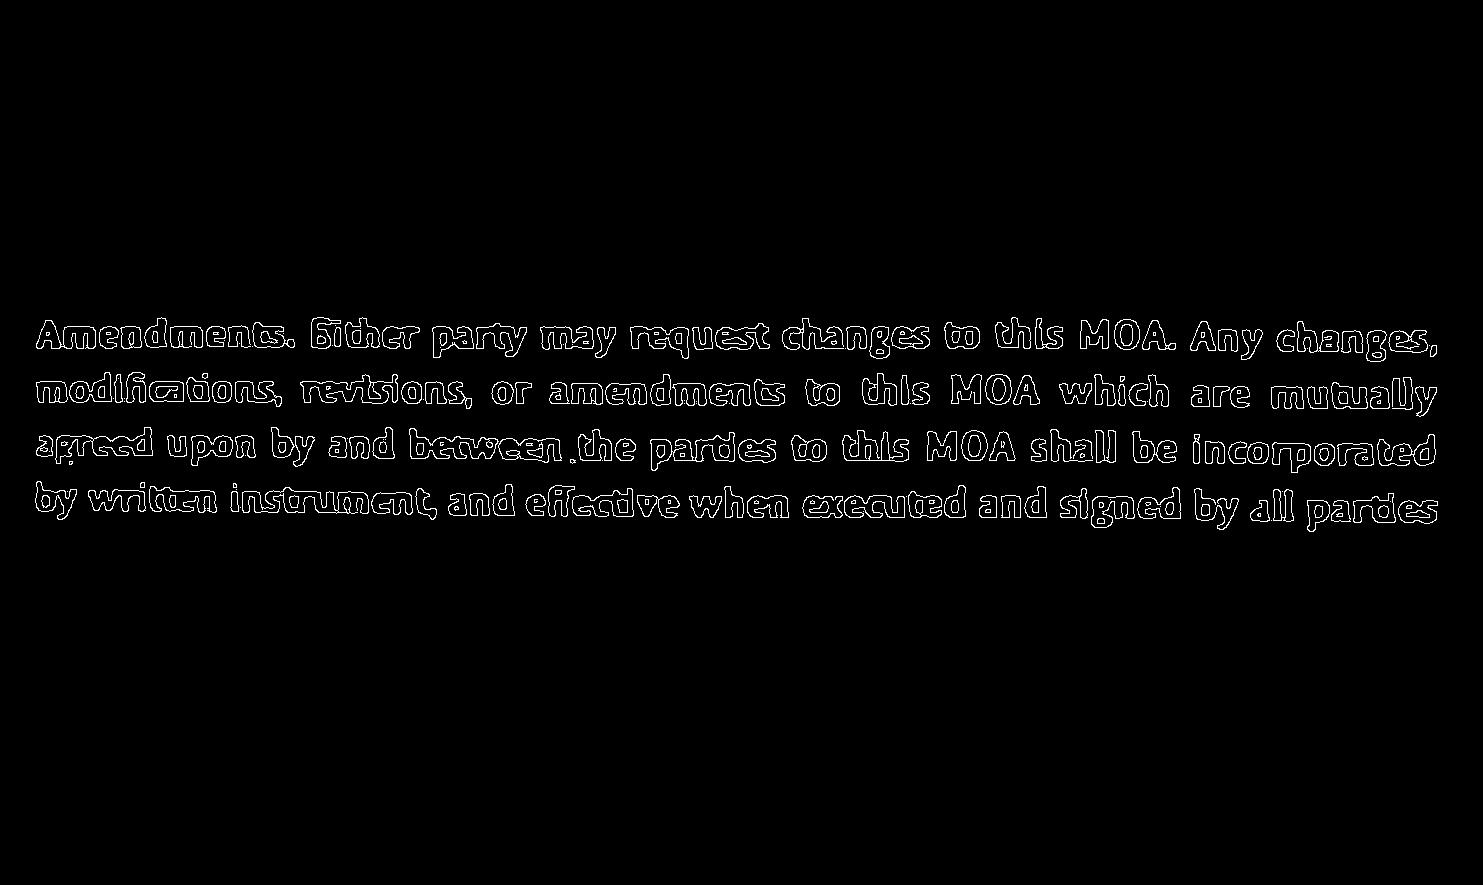

In [ ]:
edges1 = canny_edge_detection(im_bw1)
cv2_imshow(edges1)

Text Detection and Detect contours for paper boundary detection

Text extracted and saved to: text.txt
Text Detected: 
Third Party Beneficiary Rights. The rights, duties and obligations
contained in this MOA shall operate only between the parties to this MOA,
and shall insure solely to the benefits of the parties to this MOA. The
provision of this MOA are intended only to assist the parties in determining
and performing their obligations under this MOA. The parties to this MOA
intend and expressly agree that PARTIES signatory to this MOA shall have



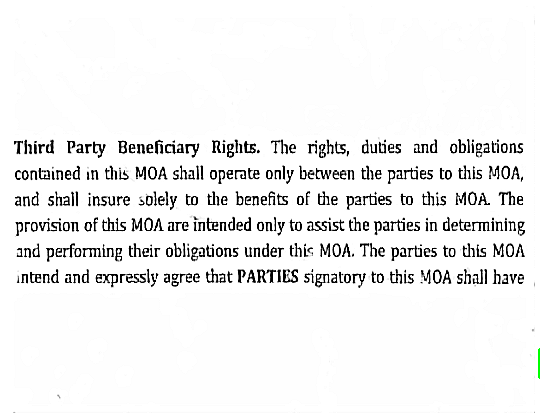

In [ ]:
target1 = find_contours(edges)
output = draw_contours(orig,sharpened_image,target1)
text = pytesseract.image_to_string(output)

# Specify the output file path
output_file = 'text.txt'

# Write the extracted text to the file
with open(output_file, 'w') as file:
    file.write(text)

print("Text extracted and saved to:", output_file)
print("Text Detected: \n"+text)
cv2_imshow(output)

Text extracted and saved to: text.txt
Text Detected: 
Amendments, Bither party may request changes to this MOA. Any changes,
modifications, revisions, or amendments to this MOA which are mutually
agreed upon by and between.the parties to this MOA shall be incorporated
by written instrument, and effective when executed and signed by all parties



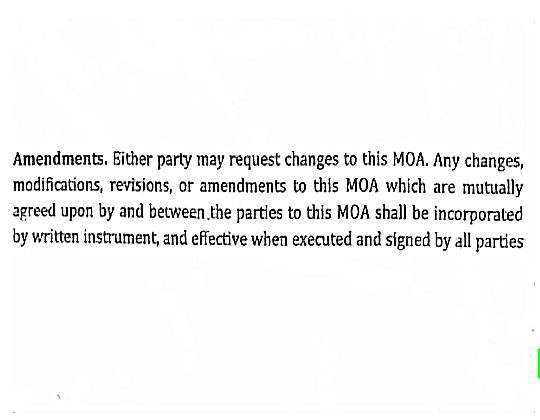

In [ ]:
target1 = find_contours(edges)
output = draw_contours(orig1,sharpened_image1,target1)
text = pytesseract.image_to_string(output)

# Specify the output file path
output_file = 'text.txt'

# Write the extracted text to the file
with open(output_file, 'w') as file:
    file.write(text)

print("Text extracted and saved to:", output_file)
print("Text Detected: \n"+text)
cv2_imshow(output)

##Easy OCR

In [ ]:
pip install easyocr

In [ ]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory

In [ ]:
easyocr_result = reader.readtext('/content/ocr_try4.png', paragraph = True,detail=0)

In [ ]:
easyocr_result

['Third Party Beneficiary Rights: The rights, duties and obligations contained in this MOA shall operate only between the parties to this MOA, and shall insure solely to the benefits of the parties to this MOA The provision of this MOA are intended only t0 assist the parties in determining and performing their obligations under thic MOA The parties to this MOA intend and expressly agree that PARTIES signatory to this MOA shall have']

In [ ]:
easyocr_result1 = reader.readtext('/content/ocr_try3.png', paragraph = True,detail=0)

In [ ]:
easyocr_result1

['Amendments. Either party may request changes to this MOA Any changes, modifications, revisions, or amendments to this MOA which are mutually agreed upon by and between the parties to this MOA shall be incorporated by written instrument and effective when executed and signed by all parties']

##Keras OCR

In [1]:
!pip install keras-ocr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.2 MB/s eta 0:00:00


In [2]:
import keras_ocr

# Step 1: Text Detection with Keras OCR

# Load the Keras OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# List of image URLs
image_urls = ['/content/ocr_try4.png']

# Read images from the URLs
images = [keras_ocr.tools.read(url) for url in image_urls]

# Initialize an empty list to store detected text along with their positions
detected_text = []

# Recognize text from each image
for image in images:
    predictions = pipeline.recognize([image])
    # Extract the text and their positions from predictions
    for prediction in predictions[0]:
        text, box = prediction
        detected_text.append((text, box[0][1]))  # Store text and the y-coordinate of the first point

# Sort the detected text by their y-coordinate to maintain line order
detected_text.sort(key=lambda x: x[1])

# Initialize variables to construct the paragraph with line breaks
paragraph = ''
previous_y = None
line_threshold = 10  # Adjust this threshold based on the average line height in your images

for text, y in detected_text:
    if previous_y is not None and abs(y - previous_y) > line_threshold:
        paragraph += '\n'
    paragraph += text + ' '
    previous_y = y

# Strip any trailing whitespace and print the paragraph containing the merged detected text
paragraph = paragraph.strip()
print(paragraph)


Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5
3/3 [==============================] - 21s 5s/step
party beneficiary obligations third duties and rights the rights 
moa between moa the this this shall only to in opelate contained parties 
of moa the the shall solely the this benefits insure and to to parties 
determining moa intended of this only the assist in to parties are provision 
under obligations moa this the moa this and performing their to parties 
parties moa that this have and ntend shall signatory expressly to agree


In [ ]:
images = [
    keras_ocr.tools.read(url) for url in ['/content/ocr_try3.png']
]
detected_text = []
for image in images:
    predictions = pipeline.recognize([image])
    # Extract the text from predictions
    for prediction in predictions[0]:
        detected_text.append(prediction[0])

# Step 2: Merging Text
# Merge the detected text into a paragraph
paragraph = ' '.join(detected_text)

# Now you have the paragraph containing the merged detected text
print(paragraph)

2/2 [==============================] - 13s 5s/step
this amendments either changes moa any request to changes party may modifications moa revisions amendments this which to mutually or are agreed by and between the moa shall this be upon parties incorporated to by written instrument and eflective when executed and signed by all parties


In [ ]:
images = [
    keras_ocr.tools.read(url) for url in ['/content/ocr_try3.png']
]
detected_text = []
for image in images:
    predictions = pipeline.recognize([image])
    # Extract the text from predictions
    for prediction in predictions[0]:
        detected_text.append(prediction[0])

# Step 2: Merging Text
# Merge the detected text into a paragraph
paragraph = ' '.join(detected_text)

# Now you have the paragraph containing the merged detected text
print(paragraph)

##CER and WER

In [ ]:
import editdistance

def calculate_cer(predicted, ground_truth):
    if not isinstance(predicted, str) or not isinstance(ground_truth, str):
        raise ValueError("Both predicted and ground_truth must be strings.")

    if len(ground_truth) == 0:
        raise ValueError("The ground_truth string must not be empty.")

    cer = editdistance.eval(predicted, ground_truth) / len(ground_truth)
    accuracy = 1 - cer
    return cer * 100, accuracy * 100  # Convert to percentage

def calculate_wer(predicted, ground_truth):
    if not isinstance(predicted, str) or not isinstance(ground_truth, str):
        raise ValueError("Both predicted and ground_truth must be strings.")

    predicted_words = predicted.split()
    ground_truth_words = ground_truth.split()

    if len(ground_truth_words) == 0:
        raise ValueError("The ground_truth string must contain at least one word.")

    wer = editdistance.eval(predicted_words, ground_truth_words) / len(ground_truth_words)
    accuracy = 1 - wer
    return wer * 100, accuracy * 100  # Convert to percentage

Tesseract

In [ ]:
# Example usage for a single sentence
ground_truth =  "Third Party Beneficiary Rights. The rights, duties and obligation contained in this MOA shall operate only between the parties to this MOA, and shall insure solely to the benefits of the parties to this MOA. The provision of this MOA are intended only to assist the parties in determining and performing their obligations under this MOA. The parties to this MOA intend and expressly agree that PARTIES signatory to this MOA shall have"
predicted = 'Third Party Beneficiary Rights. The rights, duties and obligations contained in this MOA shall operate only between the parties to this MOA, and shall insure solely to the benefits of the parties to this MOA. The provision of this MOA are intended only to assist the parties in determining and performing their obligations under this MOA. The parties to this MOA intend and expressly agree that PARTIES signatory to this MOA shall have'

try:
    cer, cer_accuracy = calculate_cer(predicted, ground_truth)
    wer, wer_accuracy = calculate_wer(predicted, ground_truth)

    print(f'Ground Truth: "{ground_truth}"')
    print(f'Predicted   : "{predicted}"')
    print(f'CER: {cer:.2f}%, Accuracy: {cer_accuracy:.2f}%')
    print(f'WER: {wer:.2f}%, Accuracy: {wer_accuracy:.2f}%')
except ValueError as e:
    print(e)


Ground Truth: "Third Party Beneficiary Rights. The rights, duties and obligation contained in this MOA shall operate only between the parties to this MOA, and shall insure solely to the benefits of the parties to this MOA. The provision of this MOA are intended only to assist the parties in determining and performing their obligations under this MOA. The parties to this MOA intend and expressly agree that PARTIES signatory to this MOA shall have"
Predicted   : "Third Party Beneficiary Rights. The rights, duties and obligations contained in this MOA shall operate only between the parties to this MOA, and shall insure solely to the benefits of the parties to this MOA. The provision of this MOA are intended only to assist the parties in determining and performing their obligations under this MOA. The parties to this MOA intend and expressly agree that PARTIES signatory to this MOA shall have"
CER: 0.23%, Accuracy: 99.77%
WER: 1.37%, Accuracy: 98.63%


In [ ]:
# Example usage for a single sentence
ground_truth =  "Amendments. Either party may request changes to this MOA. Any changes, modifications, revisions, or amendments to this MOA which are mutually agreed upon by and between the parties to this MOA shall be incorporated by written instrument, and effective when executed and signed by all parties"
predicted = 'Amendments, Bither party may request changes to this MOA. Any changes, modifications, revisions, or amendments to this MOA which are mutually agreed upon by and between.the parties to this MOA shall be incorporated by written instrument, and effective when executed and signed by all parties'

try:
    cer, cer_accuracy = calculate_cer(predicted, ground_truth)
    wer, wer_accuracy = calculate_wer(predicted, ground_truth)

    print(f'Ground Truth: "{ground_truth}"')
    print(f'Predicted   : "{predicted}"')
    print(f'CER: {cer:.2f}%, Accuracy: {cer_accuracy:.2f}%')
    print(f'WER: {wer:.2f}%, Accuracy: {wer_accuracy:.2f}%')
except ValueError as e:
    print(e)

Ground Truth: "Amendments. Either party may request changes to this MOA. Any changes, modifications, revisions, or amendments to this MOA which are mutually agreed upon by and between the parties to this MOA shall be incorporated by written instrument, and effective when executed and signed by all parties"
Predicted   : "Amendments, Bither party may request changes to this MOA. Any changes, modifications, revisions, or amendments to this MOA which are mutually agreed upon by and between.the parties to this MOA shall be incorporated by written instrument, and effective when executed and signed by all parties"
CER: 1.03%, Accuracy: 98.97%
WER: 8.70%, Accuracy: 91.30%


In [ ]:
# Example usage for a single sentence
ground_truth =  "Amendments. Either party may request changes to this MOA. Any changes, modifications, revisions, or amendments to this MOA which are mutually agreed upon by and between the parties to this MOA shall be incorporated by written instrument, and effective when executed and signed by all parties"
predicted = 'this amendments either changes moa any request to changes party may modifications moa revisions amendments this which to mutually or are agreed by and between the moa shall this be upon parties incorporated to by written instrument and eflective when executed and signed by all parties'

try:
    cer, cer_accuracy = calculate_cer(predicted, ground_truth)
    wer, wer_accuracy = calculate_wer(predicted, ground_truth)

    print(f'Ground Truth: "{ground_truth}"')
    print(f'Predicted   : "{predicted}"')
    print(f'CER: {cer:.2f}%, Accuracy: {cer_accuracy:.2f}%')
    print(f'WER: {wer:.2f}%, Accuracy: {wer_accuracy:.2f}%')
except ValueError as e:
    print(e)

Easy Ocr

In [ ]:
# Example usage for a single sentence
ground_truth =  "Third Party Beneficiary Rights. The rights, duties and obligation contained in this MOA shall operate only between the parties to this MOA, and shall insure solely to the benefits of the parties to this MOA. The provision of this MOA are intended only to assist the parties in determining and performing their obligations under this MOA. The parties to this MOA intend and expressly agree that PARTIES signatory to this MOA shall have"
predicted = 'Third Party Beneficiary Rights: The rights, duties and obligations contained in this MOA shall operate only between the parties to this MOA, and shall insure solely to the benefits of the parties to this MOA The provision of this MOA are intended only t0 assist the parties in determining and performing their obligations under thic MOA The parties to this MOA intend and expressly agree that PARTIES signatory to this MOA shall have'

try:
    cer, cer_accuracy = calculate_cer(predicted, ground_truth)
    wer, wer_accuracy = calculate_wer(predicted, ground_truth)

    print(f'Ground Truth: "{ground_truth}"')
    print(f'Predicted   : "{predicted}"')
    print(f'CER: {cer:.2f}%, Accuracy: {cer_accuracy:.2f}%')
    print(f'WER: {wer:.2f}%, Accuracy: {wer_accuracy:.2f}%')
except ValueError as e:
    print(e)

Ground Truth: "Third Party Beneficiary Rights. The rights, duties and obligation contained in this MOA shall operate only between the parties to this MOA, and shall insure solely to the benefits of the parties to this MOA. The provision of this MOA are intended only to assist the parties in determining and performing their obligations under this MOA. The parties to this MOA intend and expressly agree that PARTIES signatory to this MOA shall have"
Predicted   : "Third Party Beneficiary Rights: The rights, duties and obligations contained in this MOA shall operate only between the parties to this MOA, and shall insure solely to the benefits of the parties to this MOA The provision of this MOA are intended only t0 assist the parties in determining and performing their obligations under thic MOA The parties to this MOA intend and expressly agree that PARTIES signatory to this MOA shall have"
CER: 1.38%, Accuracy: 98.62%
WER: 8.22%, Accuracy: 91.78%


In [ ]:
# Example usage for a single sentence
ground_truth =  "Amendments. Either party may request changes to this MOA. Any changes, modifications, revisions, or amendments to this MOA which are mutually agreed upon by and between the parties to this MOA shall be incorporated by written instrument, and effective when executed and signed by all parties"
predicted = 'Amendments. Either party may request changes to this MOA Any changes, modifications, revisions, or amendments to this MOA which are mutually agreed upon by and between the parties to this MOA shall be incorporated by written instrument and effective when executed and signed by all parties'

try:
    cer, cer_accuracy = calculate_cer(predicted, ground_truth)
    wer, wer_accuracy = calculate_wer(predicted, ground_truth)

    print(f'Ground Truth: "{ground_truth}"')
    print(f'Predicted   : "{predicted}"')
    print(f'CER: {cer:.2f}%, Accuracy: {cer_accuracy:.2f}%')
    print(f'WER: {wer:.2f}%, Accuracy: {wer_accuracy:.2f}%')
except ValueError as e:
    print(e)

Ground Truth: "Amendments. Either party may request changes to this MOA. Any changes, modifications, revisions, or amendments to this MOA which are mutually agreed upon by and between the parties to this MOA shall be incorporated by written instrument, and effective when executed and signed by all parties"
Predicted   : "Amendments. Either party may request changes to this MOA Any changes, modifications, revisions, or amendments to this MOA which are mutually agreed upon by and between the parties to this MOA shall be incorporated by written instrument and effective when executed and signed by all parties"
CER: 0.69%, Accuracy: 99.31%
WER: 4.35%, Accuracy: 95.65%


In [ ]:
# Example usage for a single sentence
ground_truth =  "Amendments. Either party may request changes to this MOA. Any changes, modifications, revisions, or amendments to this MOA which are mutually agreed upon by and between the parties to this MOA shall be incorporated by written instrument, and effective when executed and signed by all parties"
predicted = 'this amendments either changes moa any request to changes party may modifications moa revisions amendments this which to mutually or are agreed by and between the moa shall this be upon parties incorporated to by written instrument and eflective when executed and signed by all parties'

try:
    cer, cer_accuracy = calculate_cer(predicted, ground_truth)
    wer, wer_accuracy = calculate_wer(predicted, ground_truth)

    print(f'Ground Truth: "{ground_truth}"')
    print(f'Predicted   : "{predicted}"')
    print(f'CER: {cer:.2f}%, Accuracy: {cer_accuracy:.2f}%')
    print(f'WER: {wer:.2f}%, Accuracy: {wer_accuracy:.2f}%')
except ValueError as e:
    print(e)

Keras

In [ ]:
# Example usage for a single sentence
ground_truth =  "Third Party Beneficiary Rights. The rights, duties and obligation contained in this MOA shall operate only between the parties to this MOA, and shall insure solely to the benefits of the parties to this MOA. The provision of this MOA are intended only to assist the parties in determining and performing their obligations under this MOA. The parties to this MOA intend and expressly agree that PARTIES signatory to this MOA shall have"
predicted = 'third duties and obligations party beneficiary rights the rights moa contained moa shall between the this this only parties opelate to in benefits of moa and shall solely the the this the insure parties to to moa intended of this only the determining provision assist parties in to are obligations under this moa the moa and performing their this parties to parties moa ntend and that this shall have expressly signatory to agree'

try:
    cer, cer_accuracy = calculate_cer(predicted, ground_truth)
    wer, wer_accuracy = calculate_wer(predicted, ground_truth)

    print(f'Ground Truth: "{ground_truth}"')
    print(f'Predicted   : "{predicted}"')
    print(f'CER: {cer:.2f}%, Accuracy: {cer_accuracy:.2f}%')
    print(f'WER: {wer:.2f}%, Accuracy: {wer_accuracy:.2f}%')
except ValueError as e:
    print(e)

Ground Truth: "Third Party Beneficiary Rights. The rights, duties and obligation contained in this MOA shall operate only between the parties to this MOA, and shall insure solely to the benefits of the parties to this MOA. The provision of this MOA are intended only to assist the parties in determining and performing their obligations under this MOA. The parties to this MOA intend and expressly agree that PARTIES signatory to this MOA shall have"
Predicted   : "third duties and obligations party beneficiary rights the rights moa contained moa shall between the this this only parties opelate to in benefits of moa and shall solely the the this the insure parties to to moa intended of this only the determining provision assist parties in to are obligations under this moa the moa and performing their this parties to parties moa ntend and that this shall have expressly signatory to agree"
CER: 62.67%, Accuracy: 37.33%
WER: 83.56%, Accuracy: 16.44%


In [ ]:
# Example usage for a single sentence
ground_truth =  "Amendments. Either party may request changes to this MOA. Any changes, modifications, revisions, or amendments to this MOA which are mutually agreed upon by and between the parties to this MOA shall be incorporated by written instrument, and effective when executed and signed by all parties"
predicted = 'this amendments either changes moa any request to changes party may modifications moa revisions amendments this which to mutually or are agreed by and between the moa shall this be upon parties incorporated to by written instrument and eflective when executed and signed by all parties'

try:
    cer, cer_accuracy = calculate_cer(predicted, ground_truth)
    wer, wer_accuracy = calculate_wer(predicted, ground_truth)

    print(f'Ground Truth: "{ground_truth}"')
    print(f'Predicted   : "{predicted}"')
    print(f'CER: {cer:.2f}%, Accuracy: {cer_accuracy:.2f}%')
    print(f'WER: {wer:.2f}%, Accuracy: {wer_accuracy:.2f}%')
except ValueError as e:
    print(e)

Ground Truth: "Amendments. Either party may request changes to this MOA. Any changes, modifications, revisions, or amendments to this MOA which are mutually agreed upon by and between the parties to this MOA shall be incorporated by written instrument, and effective when executed and signed by all parties"
Predicted   : "this amendments either changes moa any request to changes party may modifications moa revisions amendments this which to mutually or are agreed by and between the moa shall this be upon parties incorporated to by written instrument and eflective when executed and signed by all parties"
CER: 34.36%, Accuracy: 65.64%
WER: 60.87%, Accuracy: 39.13%


In [ ]:
# Example usage for a single sentence
ground_truth =  "Amendments. Either party may request changes to this MOA. Any changes, modifications, revisions, or amendments to this MOA which are mutually agreed upon by and between the parties to this MOA shall be incorporated by written instrument, and effective when executed and signed by all parties"
predicted = 'this amendments either changes moa any request to changes party may modifications moa revisions amendments this which to mutually or are agreed by and between the moa shall this be upon parties incorporated to by written instrument and eflective when executed and signed by all parties'

try:
    cer, cer_accuracy = calculate_cer(predicted, ground_truth)
    wer, wer_accuracy = calculate_wer(predicted, ground_truth)

    print(f'Ground Truth: "{ground_truth}"')
    print(f'Predicted   : "{predicted}"')
    print(f'CER: {cer:.2f}%, Accuracy: {cer_accuracy:.2f}%')
    print(f'WER: {wer:.2f}%, Accuracy: {wer_accuracy:.2f}%')
except ValueError as e:
    print(e)

Being that this is a measure of error rate, we would want a low error rate for our OCR model. From these Given results so far Tesseract is the best performing model.